# Example Analysis of the Boxing Day Earthquake 2004

The 

In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta
from itertools import compress


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [25]:
d = datetime(4,12,26);
print d.date

ms = gps_particle_data.meta_search();

e = gps_particle_data.event("Boxing Day Earthquake");
e.add_date(mins=59,hh=00,dd=26,mm=12,yy=04);
e.add_data("Geographic_Latitude",3.24);
e.add_data("Geographic_Longitude",95.8);

start_date = datetime(4,12,19);
end_date = datetime(5,1,1);

ms.load_data(start_date,end_date);
ms.apply_search(e, 7);
# ms.extend_time_window(0.25);

output_data = ms.get_selected_data("decimal_day");

#for fn in output_data.keys():
#    print;#
#    print;
#    print fn;
#    for ikey in output_data[fn].keys():
#       print ikey;
#       print output_data[fn][ikey][0];
#       print output_data[fn][ikey][-1];



<built-in method date of datetime.datetime object at 0x7f89c32786c0>
File ns41_041219_v1.03.ascii already exists 

Reading file ns41_041219_v1.03.ascii

Min Latitude         :  -56.1881
Max Latitude         :  56.1904
Min Longitude         :  -179.9404
Max Longitude         :  177.8825
Min Radius         :  4.161329
Max Radius         :  4.176166
Min L Shell         :  4.118633
Max L Shell        :  25.0
Min Day            :  354.000683
Max Day            :  360.997905
Year             :  2004.0

File ns41_041226_v1.03.ascii already exists 

Reading file ns41_041226_v1.03.ascii

Min Latitude         :  -179.2694
Max Latitude         :  178.2377
Min Longitude         :  -179.5841
Max Longitude         :  178.1846
Min Radius         :  1.3833
Max Radius         :  7185.471
Min L Shell         :  1.959381
Max L Shell        :  25.0
Min Day            :  361.000683
Max Day            :  -31.9926
Year             :  2004.0

File ns41_050102_v1.03.ascii already exists 

Reading file ns41_050

361.040972222


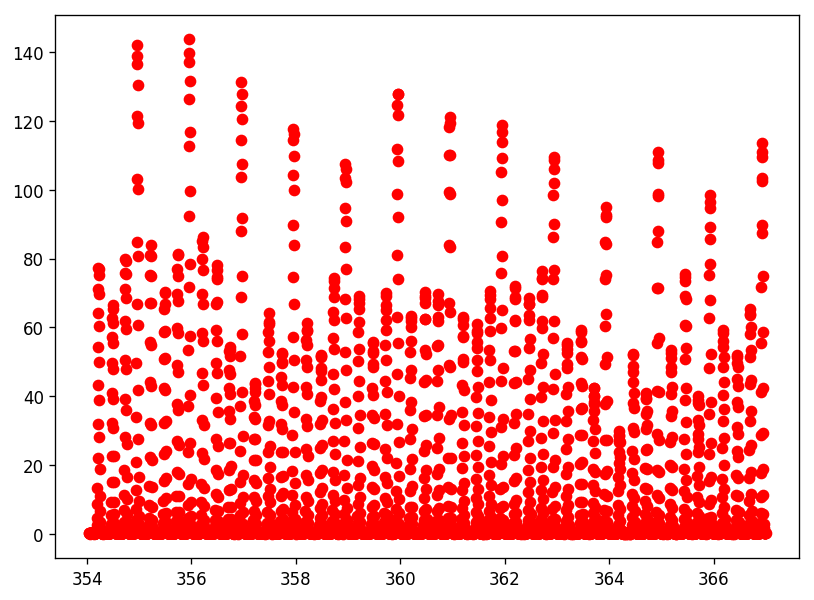

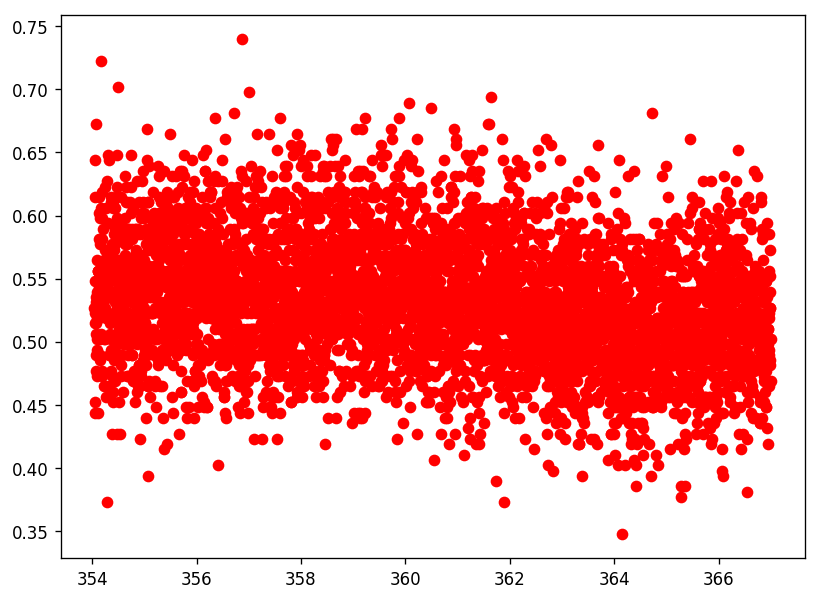

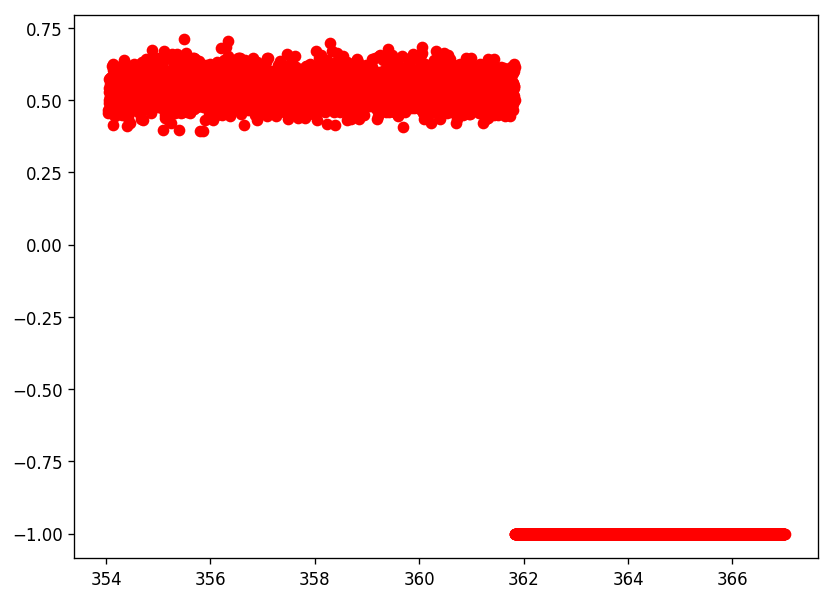

In [47]:
data_index = 0;
signal = "rate_proton_measured";
background = "proton_background"
sat_nos = ["ns41", "ns59", "ns61"];
for sat in sat_nos: 

    plt.figure(figsize=(8, 6), dpi=120);
    # plot some of the data
    filename = sat + "_041226";
    x =  output_data[filename]["decimal_day"][:]
    tmp = output_data[filename][signal][:];
    tmpb = output_data[filename][background][:];
    y = list();
    for i,it in enumerate(tmp):
        b = tmpb[i];
        y.append(it[data_index]);#/b[data_index]);
    plt.plot(x,y,'ro')

    # plot some of the data
    filename = sat + "_041219";
    x =  output_data[filename]["decimal_day"][:]
    tmp = output_data[filename][signal][:];
    tmpb = output_data[filename][background][:];
    y = list();
    for i,it in enumerate(tmp):
        b = tmpb[i];
        y.append(it[data_index]);#/b[data_index]);
    plt.plot(x,y,'ro')

    # plt.plot(output_data[0]["decimal_day"][:],output_data[0]["rate_proton_measured"][:],'ro-');
print e.data["decimal_day"];



/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_cha

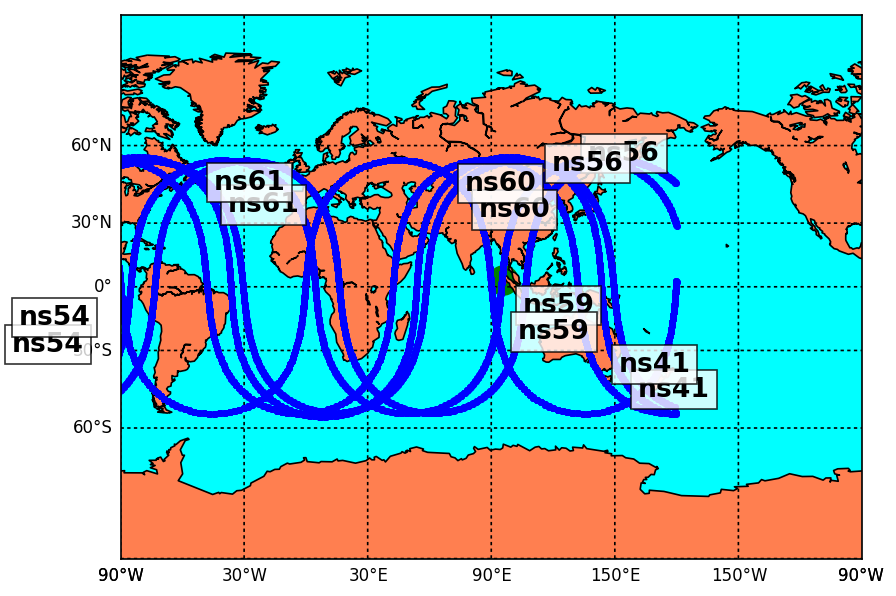

In [37]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

# miller projection
map = Basemap(projection='mill',lon_0=90)
plt.figure(figsize=(8, 6), dpi=120);
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
# CS=map.nightshade(date)

# Plot the Earthquake event on the map
lon = e.data["Geographic_Longitude"];
lat = e.data["Geographic_Latitude"];
x,y = map(lon,lat);
map.scatter(x,y,s=300,marker='o',color='g',alpha=1);
map.scatter(x,y,s=16,marker='o',color='r',alpha=1);

# Plot the projection of the satellite
#print len(output_data[fn]["Geographic_Longitude"])
#return
for fn in output_data.keys():
    
    sat_lon = output_data[fn]["Geographic_Longitude"];
    sat_lat = output_data[fn]["Geographic_Latitude"];
    xs,ys = map(sat_lon,sat_lat);
    plt.text(xs[10], ys[10],fn[0:4] , fontsize=16, fontweight='bold',bbox=dict(facecolor='w', alpha=0.8));
    #map.plot(xs,ys,marker='o',color='g',markersize=15);
    map.plot(xs,ys,marker='o',color='b',markersize=3,linewidth=0);
    #map.scatter(xs,ys,s=16,marker='o',color='b');

# plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

